In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
path1 = "WSe/projwfc/"
path2 = "VSe/projwfc/"
path3 = "Sevac/projwfc/"
F1 = -0.0447
F2 = -0.0526
F3 = -0.0818

def load_V(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#2(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#3(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#4(d)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5',])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['s2'] = dfs2.filter(regex='LDOS')
    df['p'] = dfp.filter(regex='LDOS')
    df['d'] = dfd.filter(regex='LDOS')
    df['LDOS'] = df.s1 + df.s2 +df.p + df.d
    return df

def load_W(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#2(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#3(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfp2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#4(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#5(d)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5',])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['s2'] = dfs2.filter(regex='LDOS')
    df['p1'] = dfp1.filter(regex='LDOS')
    df['p2'] = dfp1.filter(regex='LDOS')
    df['d'] = dfd.filter(regex='LDOS')
    df['LDOS'] = df.s1 + df.s2 +df.p1 + df.p2 + df.d
    return df

def load_Se(num, path):
    
    dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#1(s)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS'])
    dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#2(p)",sep="  ", comment='#', names = ['E', 'LDOS','PDOS1','PDOS2','PDOS3'])
    df = pd.DataFrame()
    df['E'] = dfs1['E']
    df['s1'] = dfs1.filter(regex='LDOS')
    df['p'] = dfp.filter(regex='LDOS')
    df['LDOS'] = df.s1 +df.p
    return df

In [119]:
df = pd.DataFrame()
df['E'] = dfs1['E']
df['s1'] = dfs1.filter(regex='LDOS')
df['s2'] = dfs2.filter(regex='LDOS')
df['p'] = dfp.filter(regex='LDOS')
df['d'] = dfd.filter(regex='LDOS')
df['LDOS'] = df.s1 + df.s2 +df.p + df.d


c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # 

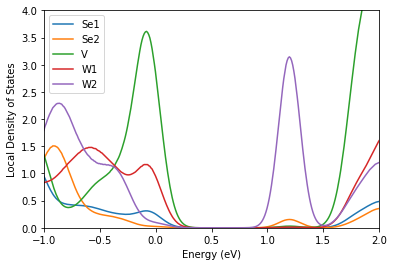

In [136]:
pth = path3
Fermi = F3

dfSe1 = load_Se(57,pth)
dfSe2 = load_Se(70,pth)
dfV = load_V(10, pth)
dfW = load_W(9, pth)
dfW2 = load_W(22, pth)


plt.plot(dfSe1.E-Fermi, dfSe1.LDOS, label='Se1')
plt.plot(dfSe2.E-Fermi, dfSe2.LDOS, label='Se2')
plt.plot(dfV.E-Fermi, dfV.LDOS, label='V')
plt.plot(dfW.E-Fermi, dfW.LDOS, label='W1')
plt.plot(dfW2.E-Fermi, dfW2.LDOS, label='W2')
plt.xlim(-1,2)
plt.ylim(0,4)
plt.xlabel("Energy (eV)")
plt.ylabel("Local Density of States")
plt.legend()
plt.show()